# データ拡張の可視化

このノートブックでは，`src/utils/transform` で実装したデータ拡張を可視化します．

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4709217..1.5632443].


1段目は元画像，2段目はデータ拡張後の画像


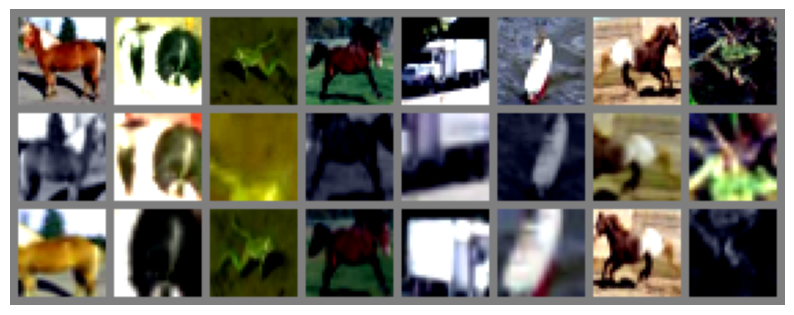

In [29]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..'))
sys.path.append(os.path.join(os.getcwd(), '..', 'src'))

import torch
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid
from src.dataset import MyCIFAR10
import yaml

# 設定ファイルの読み込み
with open('../configs/default.yaml', 'r') as f:
    config = yaml.safe_load(f)

# データセットの作成
dataset = MyCIFAR10(
    train=True,
    root=config['dataset']['root'],
    download=config['dataset']['download'],
    transform_cfg={"name":"None"}
)
augmented_dataset = MyCIFAR10(
    train=True,
    root=config['dataset']['root'],
    download=config['dataset']['download'],
    transform_cfg=config['dataset']['train_transform']
)
# サンプル画像の取得
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

def normalize(image):
    mean = torch.tensor([0.4914, 0.4822, 0.4465])
    std = torch.tensor([0.2470, 0.2435, 0.2616])
    return (image - mean[:, None, None]) / std[:, None, None]
# ランダムに8枚の画像を選択
indices = torch.randperm(len(dataset))[:8]
images = [augmented_dataset[ind][0][i] for i in range(2) for ind in indices]  # (img1, img2)のタプルを展開してリストに変換

original_images = [normalize(dataset[img][0]) for img in indices]

# グリッド表示
grid = make_grid(original_images + images, nrow=8, padding=3)
plt.figure(figsize=(10, 10))
print("1段目は元画像，2段目はデータ拡張後の画像")
imshow(grid)